# Country Time Series: Ebola

We will start by importing the necessary packages and then load our data as shown below. We will assign our data to **country_ts** data frame.

The data we are going to analyse is that of an ebola outbreak in Guinea, Liberia, SierraLeone, Nigeria, United states, Spain and Mali. The data spans 289 days, from 24 March 2014 to 1 May 2015.  

In [1]:
import pandas as pd
import numpy as np

country_ts =pd.read_csv('country_timeseries.csv')
country_ts

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


First, let's investigate our data before we start our analysis. Using the **info()** method we can see the data types of each column, as well as the number of nun-null values. From the **info**, we conclude that there were many null values in our data especially in columns corresponding to Mali. According to our investigation, Mali recorded cases and death on only 12 days while Guinea had the highest record of 93 days.

In [2]:
country_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

Next we shall set the date as our index and sort our data in ascending order- with the oldest date coming first. This is so we can have a second look at our data.

In [3]:
country_ts['Date'] = pd.to_datetime(country_ts['Date'])
country_ts.set_index('Date',inplace=True)
country_ts

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,
2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-03-27,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
2014-03-26,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-25,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
country_ts.sort_values(by=['Day'])

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,
2014-03-22,0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-24,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-25,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-26,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-27,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN


### Total cases and deaths for all countries per day

Next, we will compute the total number of cases per day for all the countries mentioned above and save the result in a column called **Cases_all**. Also, we will compute the total number of daily deaths for all the countries and save the result in a column called **Deaths_all**.

In [5]:
country_ts['Cases_all'] = country_ts.loc[:,'Cases_Guinea':'Cases_Mali'].sum(axis=1)
country_ts['Deaths_all'] = country_ts.loc[:,'Deaths_Guinea':'Deaths_Mali'].sum(axis=1)
country_ts.sort_index(ascending=True)

country_ts[['Cases_all','Deaths_all']].sort_index(ascending=True)

,Cases_all,Deaths_all
Date,,
2014-03-22,49.0,29.0
2014-03-24,86.0,59.0
2014-03-25,86.0,60.0
2014-03-26,86.0,62.0
2014-03-27,117.0,77.0
...,...,...
2014-12-31,20478.0,8037.0
2015-01-02,8157.0,3496.0
2015-01-03,20657.0,8178.0


#### Visualize for Cases_all and Deaths_all

Next, we will try to visualize the data in the two columns **(Cases_all and Deaths_all)** we just created above. We will investigate the behaviour of our result with regards to these two columns.

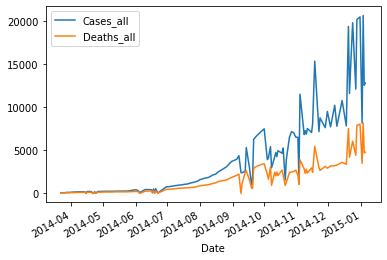

In [6]:
country_ts.plot.line(y=['Cases_all','Deaths_all'])

From the graph above, we can see that the general trend of the number of cases and deaths is upward- as expected. Also, it's stochastic or random. And therefore we would require stochastic models to model the behaviour of the ebola disease. Furthermore, one would need to employ smoothing techniques to investigate other aspect of the disease such as seasonality.

Next we will plot a histogram to have a look at the distributions of the disease, if any- both for cases and deaths.

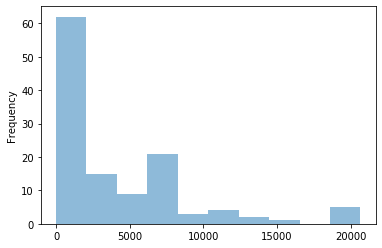

In [7]:
C = country_ts['Cases_all'].plot.hist(alpha=0.5)
C

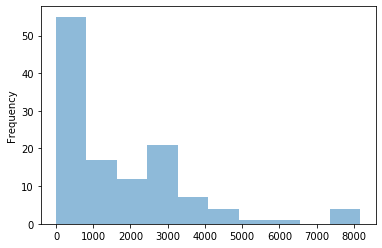

In [8]:
D = country_ts['Deaths_all'].plot.hist(alpha=0.5)
D

The distributions of the number of cases and deaths are similar- as expected. Also, from our histograms, we can deduce that the outbreak of ebola follows an exponetial distribution.

### Proportion of total deaths to cases

In this section, we will try to assess the mortality rate of the ebola disease, with the help of the data provided.

We compute the daily mortality rate for all the countries, as shown below, and save our result in a column named **mortality_all**.  

In [9]:
country_ts['mortality_all'] = country_ts['Deaths_all']/country_ts['Cases_all']
country_ts.loc[:,'Cases_all':'mortality_all'].sort_index(ascending=True)

,Cases_all,Deaths_all,mortality_all
Date,,,
2014-03-22,49.0,29.0,0.591837
2014-03-24,86.0,59.0,0.686047
2014-03-25,86.0,60.0,0.697674
2014-03-26,86.0,62.0,0.720930
2014-03-27,117.0,77.0,0.658120
...,...,...,...
2014-12-31,20478.0,8037.0,0.392470
2015-01-02,8157.0,3496.0,0.428589
2015-01-03,20657.0,8178.0,0.395895


#### Now we will plot a line graph to visualize the daily mortality rate computed above

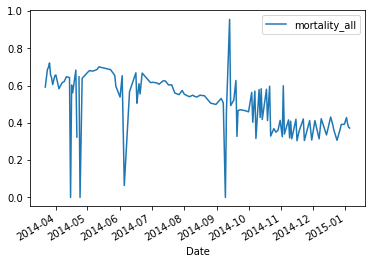

In [10]:
country_ts.plot.line(y=['mortality_all'])

From the graph above, we can see that the mortality rate is random. At some point (around october 2014) the mortality rate was almost one. Meaning that if you caught the disease you would almost certainly die. This goes to show how deadly the disease of ebola really is.

However, the mortality rate stayed constant- on the whole. Also, another peron would say that the mortality generally slightly decreased with time.

### Total number of cases and deaths per country for all the days

Now let's investigate the total number of cases and deaths per country. We shall start with assessing the total number of cases and then move on to total number of deaths.

In [11]:
Ttl_perCountryCases = country_ts.loc[:,'Cases_Guinea':'Cases_Mali'].sum()
Ttl_perCountryCases

Cases_Guinea           84729.0
Cases_Liberia         193833.0
Cases_SierraLeone     211181.0
Cases_Nigeria            636.0
Cases_Senegal             27.0
Cases_UnitedStates        59.0
Cases_Spain               16.0
Cases_Mali                42.0
dtype: float64

From the the data above, it seems clear that there are two groups of countries. Those that were seriously hit (Ginuea, Liberia, and SierraLeonand) and those that were not very much affected. So we can analysize these two groups seperately. Let's save the data for these two groups as 'severe' and 'less_affected', respectively.

In [12]:
severe = Ttl_perCountryCases[0:3]
less_affected = Ttl_perCountryCases[3:]
print(severe, '\n')
less_affected

Cases_Guinea          84729.0
Cases_Liberia        193833.0
Cases_SierraLeone    211181.0
dtype: float64 



Cases_Nigeria         636.0
Cases_Senegal          27.0
Cases_UnitedStates     59.0
Cases_Spain            16.0
Cases_Mali             42.0
dtype: float64

#### visualize the above using a pie chart

Next, we visualize the extent to which the countries were affected by the disease with the help of pie charts.

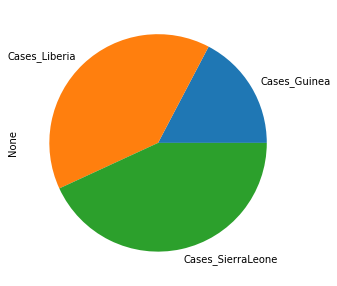

In [13]:
plot = severe.plot.pie(subplots=True,figsize=(5, 5))

It's evident from the plot above that among all the countries that were severely hit by ebola, Guinea took the smallest slice of the pie.

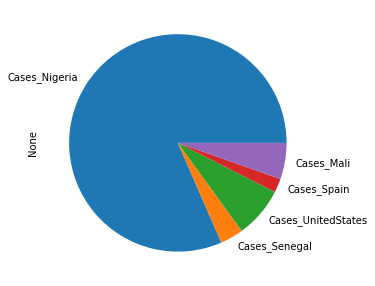

In [14]:
plot = less_affected.plot.pie(subplots=True,figsize=(5, 5))

And finally but not least, among the leasted affected countries, Nigeria takes the biggest slice of the pie.

In a nutshell, as seen from the pie charts above, only three countries had relatively significant cases. So it would be wise to concetrate further analysis on these three countries- if hope to gain the most information about ebola outbreaks.

Let's now analyse the total number of deaths per country.

In [15]:
Ttl_DeathsperCountry = country_ts.loc[:,'Deaths_Guinea':'Deaths_Mali'].sum()
Ttl_DeathsperCountry

Deaths_Guinea          51818.0
Deaths_Liberia         89198.0
Deaths_SierraLeone     60352.0
Deaths_Nigeria           233.0
Deaths_Senegal             0.0
Deaths_UnitedStates       15.0
Deaths_Spain               3.0
Deaths_Mali               38.0
dtype: float64

Again, we will group the deaths as we did above for the cases. Senegal had no deaths so we can take it out of our deaths analysis.

In [16]:
severe_deaths = Ttl_DeathsperCountry[0:3]
#least death with senegal excluded
less_deaths = Ttl_DeathsperCountry[3:].drop(labels='Deaths_Senegal' )
print(severe,'\n')
print(less_deaths)

Cases_Guinea          84729.0
Cases_Liberia        193833.0
Cases_SierraLeone    211181.0
dtype: float64 

Deaths_Nigeria         233.0
Deaths_UnitedStates     15.0
Deaths_Spain             3.0
Deaths_Mali             38.0
dtype: float64


#### visualize the above using a pie chart

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002AC2CE9F888>],
      dtype=object)

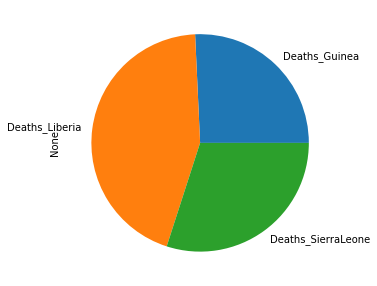

In [17]:
severe_deaths.plot(kind='pie', subplots=True,figsize=(5, 5),)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002AC2DEB9B08>],
      dtype=object)

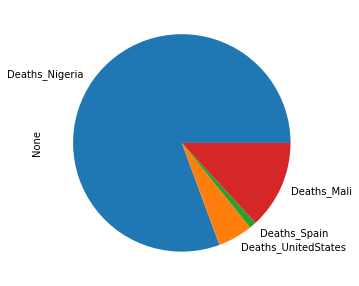

In [18]:
less_deaths.plot.pie(subplots=True,figsize=(5, 5))

#### Country Statistics: Cases and Deaths

In this section we'll compute some statistics for each country. We will start with the cases statistics and move on the death statistics

In [19]:
country_ts.loc[:,'Cases_Guinea':'Cases_Mali'].describe()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali
count,93.000000,83.000000,87.000000,38.000000,25.00,18.000000,16.0,12.000000
mean,911.064516,2335.337349,2427.367816,16.736842,1.08,3.277778,1.0,3.500000
std,849.108801,2987.966721,3184.803996,5.998577,0.40,1.178511,0.0,2.746899
min,49.000000,3.000000,0.000000,0.000000,1.00,1.000000,1.0,1.000000
25%,236.000000,25.500000,64.500000,15.000000,1.00,3.000000,1.0,1.000000
50%,495.000000,516.000000,783.000000,20.000000,1.00,4.000000,1.0,2.500000
75%,1519.000000,4162.500000,3801.000000,20.000000,1.00,4.000000,1.0,6.250000
max,2776.000000,8166.000000,10030.000000,22.000000,3.00,4.000000,1.0,7.000000


From the statistics table above, we can see that the highest number of cases recorded on a single day (10,030) came from SierraLeone. Also, the highest average number number of cases came from the same country. While Spain registered the least numbers in almost all departments.

In [20]:
country_ts.loc[:,'Deaths_Guinea':'Deaths_Mali'].describe()

,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
count,92.000000,81.000000,87.000000,38.000000,22.0,18.000000,16.000000,12.000000
mean,563.239130,1101.209877,693.701149,6.131579,0.0,0.833333,0.187500,3.166667
std,508.511345,1297.208568,869.947073,2.781901,0.0,0.383482,0.403113,2.405801
min,29.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
25%,157.750000,12.000000,6.000000,4.000000,0.0,1.000000,0.000000,1.000000
50%,360.500000,294.000000,334.000000,8.000000,0.0,1.000000,0.000000,2.000000
75%,847.750000,2413.000000,1176.000000,8.000000,0.0,1.000000,0.000000,6.000000
max,1786.000000,3496.000000,2977.000000,8.000000,0.0,1.000000,1.000000,6.000000


Unlike the number of daily cases, when it comes to daily deaths, Liberia recorded the highest number (3496) while Senegal had no deaths.

Next we compute statistics for all the daily cases and deaths as well as the statistics for the daily mortality rate accross all countries.

In [21]:
country_ts.loc[:,'Cases_all':'mortality_all'].describe()

,Cases_all,Deaths_all,mortality_all
count,122.000000,122.000000,121.000000
mean,4020.680328,1652.926230,0.503180
std,4893.572080,1818.948285,0.154743
min,0.000000,0.000000,0.000000
25%,248.250000,168.000000,0.402774
50%,1911.500000,987.000000,0.544711
75%,6760.000000,2660.250000,0.614943
max,20657.000000,8178.000000,0.954616


The table above informs us that the average daily mortality rate of ebola is approximately 0.5. This means that when one catches the disease, the chances they will die are 50%. It is more like flipping a coin. Hence the disease is very dangerous. This is reinforced by the fact that, on some day, the mortality rate was close to 1. According to our data the case fatality rate varies from 0% to 95%.

Just to put our mortality rates in perspective. According the the WHO, the average EVD case fatality rate is around 50% and case fatality rates have varied from 25% to 90% in past outbreaks.

#### which country had the most cases?

In [22]:
country_ts.loc[:,'Cases_Guinea':'Cases_Mali'].sum().idxmax().strip('Cases_')

'SierraLeon'

#### which country had the most deaths?

In [23]:
country_ts.loc[:,'Deaths_Guinea':'Deaths_Mali'].sum().idxmax().strip('Deaths_')

'Liberi'

### Transform the data 

We will now transform the data to analize mortality per country. To accomplish this, we will melt both cases and deaths. Then later compute the mortality rate per country.

First we melt according to cases, save our result in a data frame called **country_transform1** and group by country.

In [24]:
list_vars=['Cases_Guinea','Cases_Liberia','Cases_SierraLeone','Cases_Nigeria','Cases_Senegal','Cases_UnitedStates','Cases_Spain','Cases_Mali']

country_transform1 = country_ts.melt(value_vars=list_vars, id_vars = 'Day',var_name="Country",value_name='num_Cases')
#replace the 'Case_' after each country name by an empty string
country_transform1['Country'] = country_transform1['Country'].str.replace('Cases_','')
country_transform1 = country_transform1.set_index('Day').groupby('Country').agg('sum')
country_transform1

,num_Cases
Country,
Guinea,84729.0
Liberia,193833.0
Mali,42.0
Nigeria,636.0
Senegal,27.0
SierraLeone,211181.0
Spain,16.0
UnitedStates,59.0


Then we melt according to deaths, save our result in a data frame called **country_transform2** and group by country.

In [25]:
list_vars2=['Deaths_Guinea','Deaths_Liberia','Deaths_SierraLeone','Deaths_Nigeria','Deaths_Senegal','Deaths_UnitedStates','Deaths_Spain','Deaths_Mali']

country_transform2 = country_ts.melt(value_vars=list_vars2, id_vars = 'Day',var_name="Country",value_name='num_Deaths')
#replace the 'Deaths_' after each country name by an empty string
country_transform2['Country'] = country_transform2['Country'].str.replace('Deaths_','')
country_transform2 = country_transform2.set_index('Day').groupby('Country').agg('sum')
country_transform2

,num_Deaths
Country,
Guinea,51818.0
Liberia,89198.0
Mali,38.0
Nigeria,233.0
Senegal,0.0
SierraLeone,60352.0
Spain,3.0
UnitedStates,15.0


Finally, we join the two data frames we just constructed into a single data frame named **country_transform**. We shall then compute the mortality rate per country.

In [26]:
country_transform = pd.concat([country_transform1,country_transform2], axis=1)
country_transform['mortality_perCountry'] = country_transform['num_Deaths']/country_transform['num_Cases']
country_transform

,num_Cases,num_Deaths,mortality_perCountry
Country,,,
Guinea,84729.0,51818.0,0.611573
Liberia,193833.0,89198.0,0.460180
Mali,42.0,38.0,0.904762
Nigeria,636.0,233.0,0.366352
Senegal,27.0,0.0,0.000000
SierraLeone,211181.0,60352.0,0.285783
Spain,16.0,3.0,0.187500
UnitedStates,59.0,15.0,0.254237


From the above data frame or table, we can see that Mail recorded the highest mortality rate of about 90%- meaning that if you caught ebola in Mail, the chances that you would survive are slim to none. But in Senegal, it seems to be the opposite since there were no deaths recorded.

We can also deduce that the mortality rates fall with in the theoretical limits (25% to 90%).

It's worth investigating why the mortality rates are high in some countries and relatively low in others.